In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

================= Computational Cancer Analysis Library (CCAL) =================
Planted a random seed: 20121020.


In [2]:
def drop_value_from_dataframe(dataframe, value, axis=0):
    if axis == 0:
        dropped = (dataframe == value).all(axis=0)
        if any(dropped):
            print('Removed {} column index(ices) whoes values are all {}.'.format(sum(dropped), value))
        return dataframe.ix[:, ~dropped]
    elif axis == 1:
        dropped = (dataframe == value).all(axis=1)
        if any(dropped):
            print('Removed {} row index(ices) whoes values are all {}.'.format(sum(dropped), value))
        return dataframe.ix[~dropped, :]

# Test with real data

## Define states

In [ ]:
h = ccal.support.read_gct('data/hema_k9_H.gct')
ks = [1, 3, 6 ,9, 12, 15]
distance_matrix, clusterings, cophenetic_correlations = ccal.define_states(h,
                                                                           ks,
                                                                           n_clusterings=30,
                                                                           max_std=5,
                                                                           directory_path='result/define_states/')

<125552> Loading distances between samples already computed ...
<125552> Consensus clustering with 30 clusterings ...
<125552> k=1 ...
<125552> 	Permuting distance matrix with repeat and clustering (0/30) ...
<125552> 	Permuting distance matrix with repeat and clustering (10/30) ...
<125552> 	Permuting distance matrix with repeat and clustering (20/30) ...
<125552> 	Making consensus matrix from 30 hierarchical clusterings of randomized distance matrix ...
<125552> k=3 ...
<125552> 	Permuting distance matrix with repeat and clustering (0/30) ...
<125552> 	Permuting distance matrix with repeat and clustering (10/30) ...
<125552> 	Permuting distance matrix with repeat and clustering (20/30) ...
<125552> 	Making consensus matrix from 30 hierarchical clusterings of randomized distance matrix ...
<125552> k=6 ...
<125552> 	Permuting distance matrix with repeat and clustering (0/30) ...
<125552> 	Permuting distance matrix with repeat and clustering (10/30) ...
<125552> 	Permuting distance mat

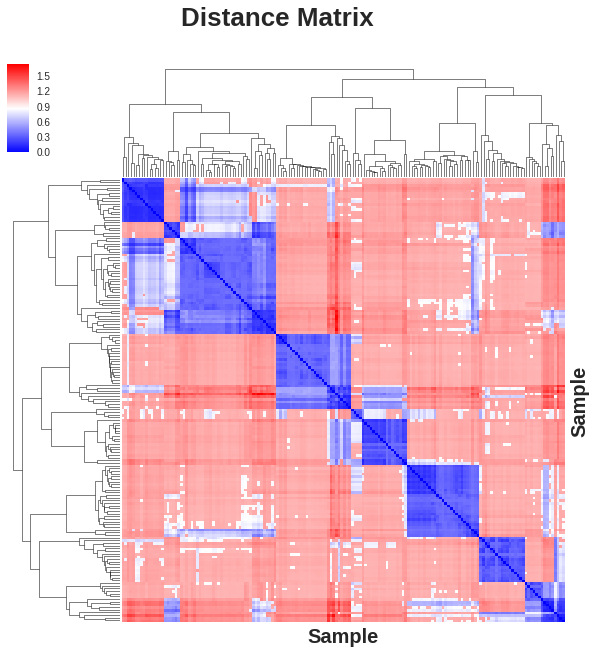

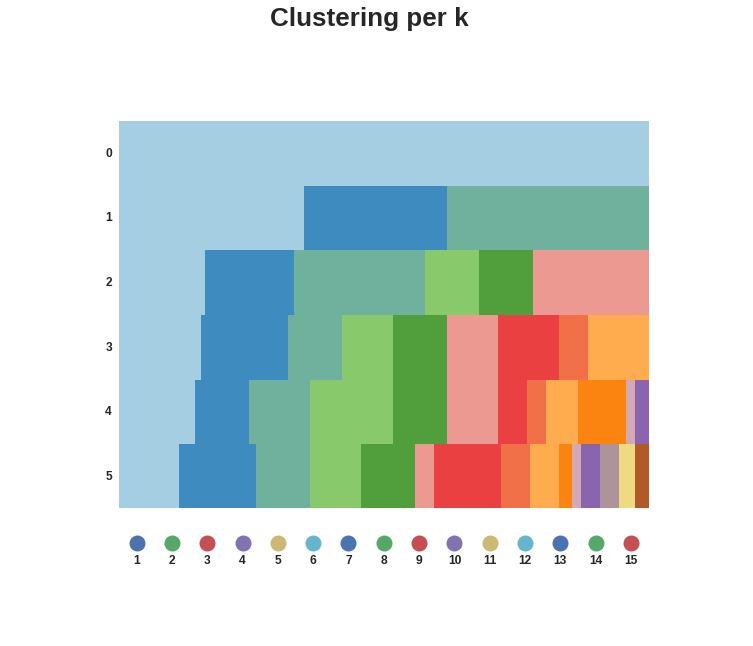

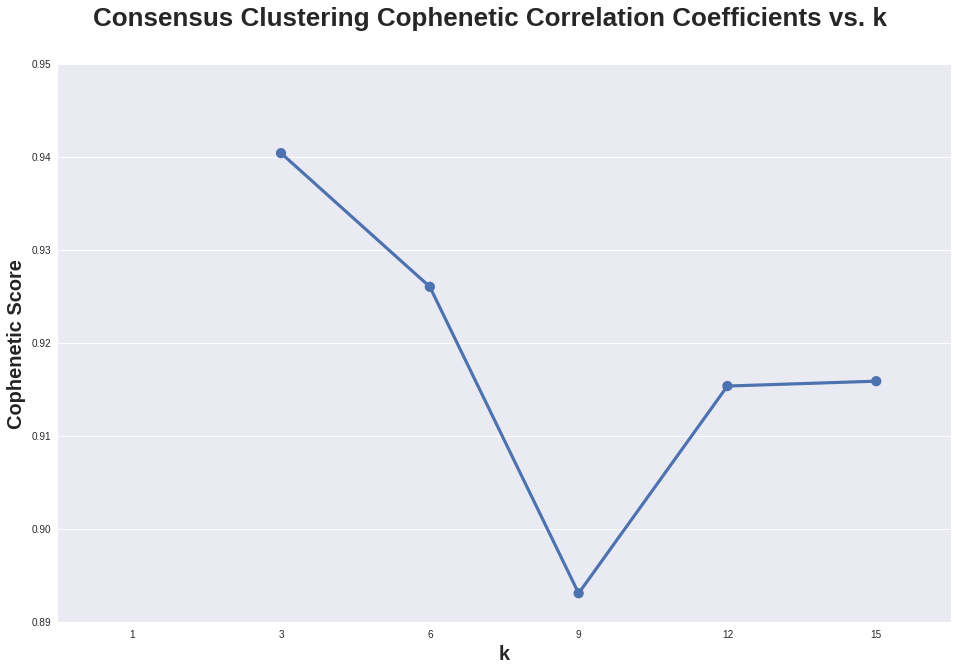

In [3]:
h = ccal.support.read_gct('data/hema_k9_H.gct')
ks = [1, 3, 6 ,9, 12, 15]
distance_matrix_r, clusterings_r, cophenetic_correlations_r = ccal.define_states(h,
                                                                                 ks,
                                                                                 distance_matrix=ccal.read_gct('data/hema_k9_distance_matrix.gct'),
                                                                                 n_clusterings=30,
                                                                                 max_std=5,
                                                                                 directory_path='result/define_states/')

## Make Onco-GPS

<125616> 	Components: {'nmf_compC3_9', 'nmf_compC7_9', 'nmf_compC2_9', 'nmf_compC5_9', 'nmf_compC8_9', 'nmf_compC4_9', 'nmf_compC1_9', 'nmf_compC6_9', 'nmf_compC9_9'}
<125616> 	States: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
<125616> Clipping and 0-1 normalizing rows ...
<125616> Making Onco-GPS with 9 components, 166 samples, and 12 states ...
<125616> Computing component coordinates with informational distance ...
<125616> Computing associations (axis=1) between matrices (0/9) ...
<125617> Computing associations (axis=1) between matrices (1/9) ...
<125617> Computing associations (axis=1) between matrices (2/9) ...
<125617> Computing associations (axis=1) between matrices (3/9) ...
<125617> Computing associations (axis=1) between matrices (4/9) ...
<125617> Computing associations (axis=1) between matrices (5/9) ...
<125617> Computing associations (axis=1) between matrices (6/9) ...
<125617> Computing associations (axis=1) between matrices (7/9) ...
<125617> Computing associations (axi

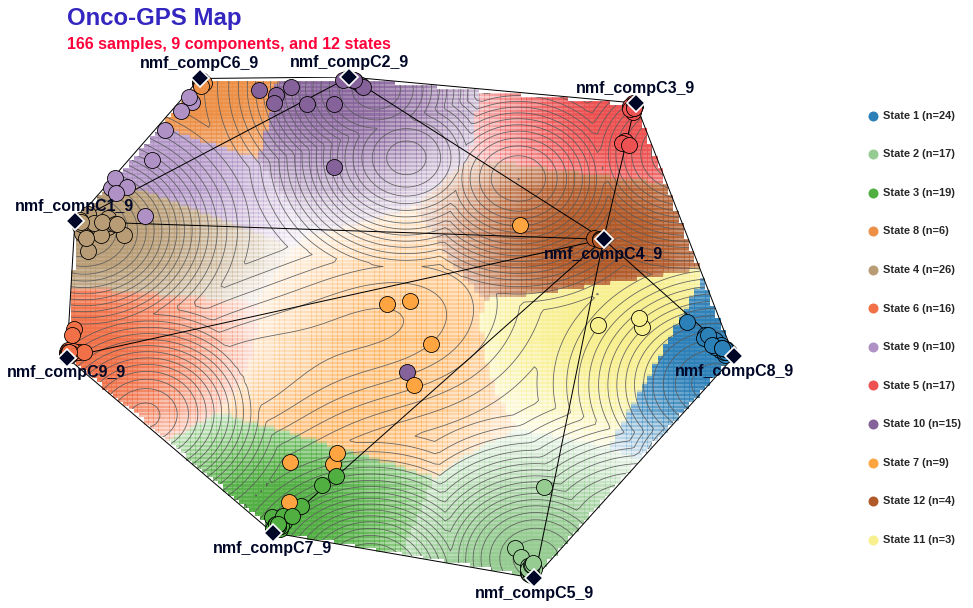

In [5]:
state_labels = clusterings_r.ix[12, :]
ccal.make_oncogps_map(h, state_labels, filepath='result/make_oncogps_map.pdf')

# Test with random data

## Make Onco-GPS

In [ ]:
ccal.support.VERBOSE = True

h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
ks = list(range(2,13))

for n_components in [3, 4, 6, 9]:
    print('n_components:', n_components)
    for n_state in ks[::5]:
        print('n_state:', n_state)
        ccal.onco_gps.make_map(h.iloc[:n_components, :], np.random.choice(list(range(1, n_state + 1)), h.shape[1]))
        ccal.onco_gps.make_map(h.iloc[:n_components, :], np.random.choice(list(range(1, n_state + 1)), h.shape[1]), n_pullratio_components=2)
        ccal.onco_gps.make_map(h.iloc[:n_components, :], np.random.choice(list(range(1, n_state + 1)), h.shape[1]), colors=['#E52339',
                                                                                                                            '#4682B4',
                                                                                                                            '#BAFF51',
                                                                                                                            '#614C82',
                                                                                                                            '#FF8C00',
                                                                                                                            '#FFFF00',
                                                                                                                            '#DB7093',
                                                                                                                            '#B0E0E6',
                                                                                                                            '#09DCFF',
                                                                                                                            '#5F9EA0',
                                                                                                                            '#008000',
                                                                                                                            '#A479E7',
                                                                                                                            '#FFC0CB',
                                                                                                                            '#FFFFCC',
                                                                                                                            '#EF97EA',
                                                                                                                            '#DFCBFF',
                                                                                                                            '#FF00FF',
                                                                                                                            '#FB5200',
                                                                                                                            '#FFD700',
                                                                                                                            '#FF0000',
                                                                                                                            '#FF7F50',
                                                                                                                            '#8B0000',
                                                                                                                            '#6B8E23',
                                                                                                                            '#5F51FF',
                                                                                                                            '#B27E3C',
                                                                                                                            '#644824',
                                                                                                                            '#A0522D'])
        for annotation_type in ['continuous', 'categorical', 'binary']:
            print('annotation_type:', annotation_type)
            if annotation_type == 'continuous':
                annotations = np.random.random_sample(h.shape[1])
            elif annotation_type == 'categorical':
                annotations = np.random.choice(range(n_state), h.shape[1])
            elif annotation_type == 'binary':
                annotations = np.random.choice(range(2), h.shape[1])
            else:
                raise ValueError('Error in annotation_type.')
            ccal.onco_gps.make_map(h.iloc[:n_components, :],
                                   np.random.choice(list(range(1, n_state + 1)), h.shape[1]),
                                   annotations=annotations,
                                   annotation_type=annotation_type)

# Project samples

In [ ]:
state = 12
states = labels.ix[state, :]

In [ ]:
ccal.onco_gps.make_map(h, states)

In [ ]:
ccal.onco_gps.make_map(h, states, h_test=h, states_test=states)

In [ ]:
n = 10
ccal.onco_gps.make_map(h, states, h_test=h.iloc[:, :n], states_test=states[:n])
ccal.onco_gps.make_map(h, states, h_test=h.iloc[:, :n], states_test=states[:n], h_test_normalization='clip_and_0-1')
ccal.onco_gps.make_map(h, states, h_test=h.iloc[:, :n], states_test=states[:n], h_test_normalization=None)

# Test real data

In [ ]:
H = ccal.support.read_gct('/home/cyborg/Downloads/KRAS_Matrix.gct')

MEMBERSHIPS = pd.read_csv('/home/cyborg/Downloads/KRAS_membership.gct', sep='\t', index_col=0)
K17_MEMBERSHIPS = MEMBERSHIPS.ix[:, 'k_17']
K17_MEMBERSHIPS_INT = K17_MEMBERSHIPS.apply(lambda s: int(s[1:])).tolist()

In [ ]:
ccal.onco_gps.make_map(H, K17_MEMBERSHIPS_INT, background_markersize=0, background_mask_markersize=0)

In [ ]:
training_h = H
empty = np.empty
X = 3
Y = 10
ratios = empty(training_h.shape[1])
for i, (c_idx, c) in enumerate(training_h.iteritems()):
    c_sorted = c.sort_values(ascending=False)
    ratio = float(c_sorted[:X].sum() / c_sorted[X:].sum()) * c.sum()
    ratios[i] = ratio
normalized_ratios = (ratios - ratios.min()) / (ratios.max() - ratios.min())
normalized_ratios *= Y
normalized_ratios.clip(0, 1)

In [ ]:
ccal.onco_gps.make_map(H, K17_MEMBERSHIPS_INT, background_markersize=0, background_mask_markersize=0)

In [ ]:
RPKM = ccal.support.read_gct('/home/cyborg/data/ccle/ccle_rpkm.gct')

CD274_RPKM = RPKM.ix['CD274', :]
CD274_SAMPLES_IN_H = CD274_RPKM.index & H.columns
H_CD274 = H.ix[:, CD274_SAMPLES_IN_H]
K17_MEMNERSHIPS_CD274 = K17_MEMBERSHIPS.ix[CD274_SAMPLES_IN_H].apply(lambda s: int(s[1:])).tolist()

In [ ]:
ccal.onco_gps.make_map(H, K17_MEMBERSHIPS_INT, annotations=CD274_RPKM.ix[H.columns])

In [ ]:
ccal.onco_gps.make_map(H, K17_MEMBERSHIPS_INT, h_test=H_CD274, states_test=K17_MEMNERSHIPS_CD274, annotations=CD274_RPKM.ix[H_CD274.columns])